# Vila Moema Reference Station Data - Diamante Energia

## Constants and imports

### Imports

In [1]:
from SensorData import SensorData
from GetSensorDataService import GetSensorDataService
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load data from file

In [41]:
import pandas as pd

air_quality_data = pd.read_csv("data/air-quality-reference-data-Diamante/Qar_VilaMoema_Jan22_a_Fev23.csv",
                    decimal=',', sep=';', skiprows=[1,2,3])
air_quality_data['DateTime'] = (pd.to_datetime(air_quality_data['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))
air_quality_data = (air_quality_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns=['index','Data e Hora']))
air_quality_data.index = air_quality_data['DateTime']
air_quality_data = air_quality_data.drop(columns='DateTime')

data_jan_dez_22 = pd.read_csv("data/air-quality-reference-data-Diamante/Qar_VilaMoema_Jan_a_Dez22.csv", 
                                decimal=',', sep=';', skiprows=[1])
data_jan_dez_22['DateTime'] = (pd.to_datetime(data_jan_dez_22['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))
data_jan_dez_22 = (data_jan_dez_22.sort_values(by='DateTime', ascending=True).reset_index().drop(columns=['index','Data e Hora']))
data_jan_dez_22.index = data_jan_dez_22['DateTime']
data_jan_dez_22 = data_jan_dez_22.drop(columns='DateTime')

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_3200/27230340.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  air_quality_data['DateTime'] = (pd.to_datetime(air_quality_data['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))
/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_3200/27230340.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_jan_dez_22['DateTime'] = (pd.to_datetime(data_jan_dez_22['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))


In [42]:
air_quality_data.head()

,Partículas Totais em Suspensão,Material Particulado <10µm,Óxidos de Nitrogênio,Dióxido de Nitrogênio,Dióxido de Enxofre,Monóxido de Nitrogênio,Ozônio,Material Particulado <2.5µm,Monóxido de Carbono
DateTime,,,,,,,,,
2022-01-01 02:30:00,40.0,31.0,4.63,4.02,4.46,0.61,13.23,9.0,0.1467
2022-01-01 03:30:00,43.0,37.0,5.31,4.38,4.33,0.93,12.07,15.0,0.1544
2022-01-01 04:30:00,32.0,22.0,9.77,8.66,4.48,1.11,13.24,9.0,0.1167
2022-01-01 05:30:00,22.0,16.0,9.91,8.57,4.44,1.34,14.42,8.0,0.1079
2022-01-01 06:30:00,27.0,16.0,9.88,8.10,4.58,1.78,13.30,5.0,0.1154


## Plot data

<Axes: xlabel='DateTime'>

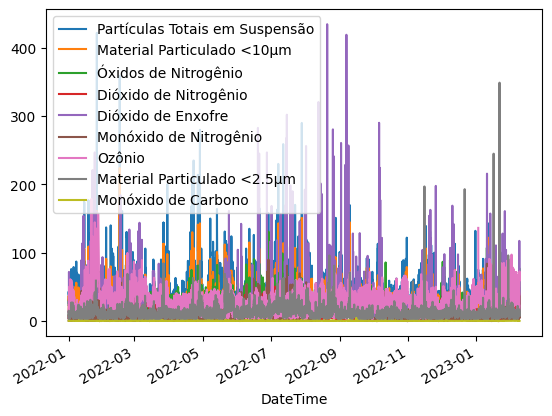

In [43]:
air_quality_data.plot()

## Save Data

In [45]:
air_quality_data.to_csv('data-processing/input/ref_air_quality_data_Vila_Moema.csv')